In [1]:
!pip3 install basemap

     |████████████████████████████████| 862 kB 626 kB/s            
     |████████████████████████████████| 219 kB 27.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 15.7 MB 27.5 MB/s            
     |████████████████████████████████| 30.5 MB 44.6 MB/s            
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=eeb5a6bd25ccd0b4b246ea03a7e6b5ba76a115532e2481f0a0dfb20991b9fc55
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.2.0
    Uninstalling pyshp-2.2.0:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
data = pd.read_csv('../input/earthquake-database/database.csv')

In [4]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data.shape

(23412, 21)

In [6]:
print("Min Value: "+ str(data['Magnitude'].min()))
print("Max Value: " + str(data['Magnitude'].max()))

Min Value: 5.5
Max Value: 9.1


In [7]:
g8 = data[data['Magnitude'] > 8]
g8['Location Source'].value_counts()

US        22
ISCGEM     5
Name: Location Source, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

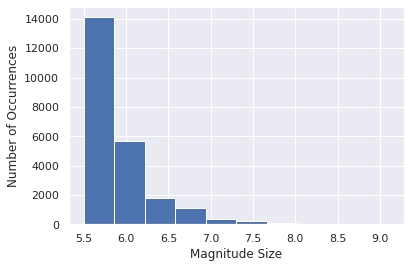

In [8]:
plt.hist(data['Magnitude'])

plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')

 local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)


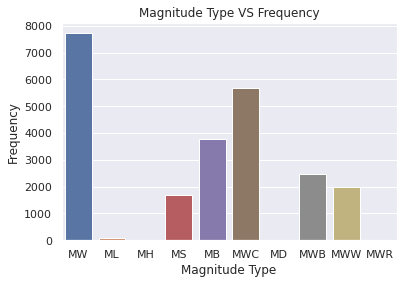

In [9]:
sns.countplot(x="Magnitude Type", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Type VS Frequency')
print(" local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)")

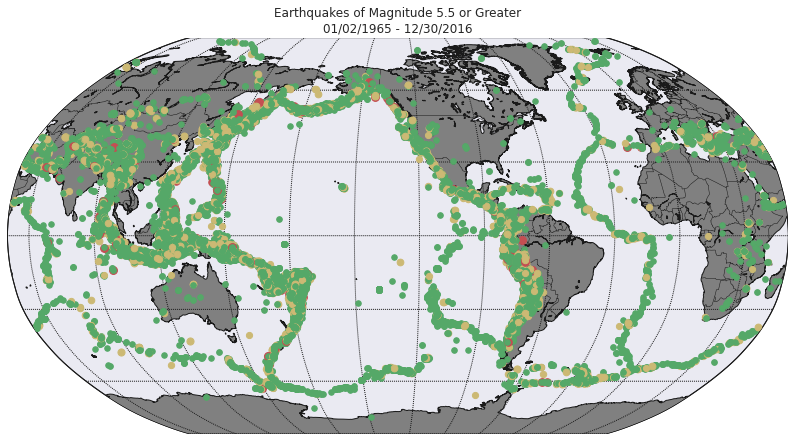

In [10]:
def get_marker_color(magnitude):
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

plt.figure(figsize=(14,10))

eq_map = Basemap(projection='robin', resolution = 'l',
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
# read longitude, latitude and magnitude
lons = data['Longitude'].values
lats = data['Latitude'].values
magnitudes = data['Magnitude'].values
timestrings = data['Date'].tolist()
    
min_marker_size = 0.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag # * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)

plt.show()

Text(0.5, 1.0, 'Number of Earthquakes In Each Year')

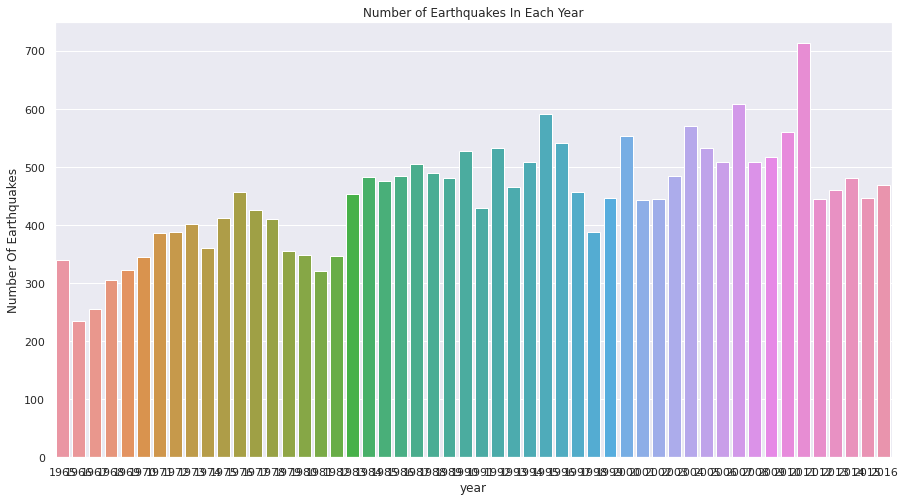

In [11]:
import datetime
data['date'] = data['Date'].apply(lambda x: pd.to_datetime(x))
data['year'] = data['date'].apply(lambda x: str(x).split('-')[0])
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.0)
sns.countplot(x="year", data=data)
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')

In [12]:
data['year'].value_counts()[:1]

2011    713
Name: year, dtype: int64

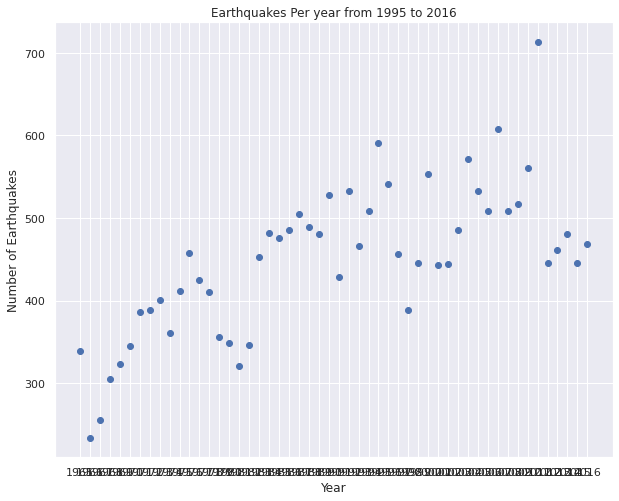

In [13]:
x = data['year'].unique()
y = data['year'].value_counts()

count = []
for i in range(len(x)):
    key = x[i]
    count.append(y[key])

plt.figure(figsize=(10, 8))

plt.scatter(x, count)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes Per year from 1995 to 2016')
plt.show()

## Magnitude Classes

- **Disastrous**:   M > =8
- **Major**:   7 < =M < 7.9
- **Strong**:  6 < = M < 6.9
- **Moderate**: 5.5 < =M < 5.9

In [14]:
data.loc[data['Magnitude'] >=8, 'Class'] = 'Disastrous'
data.loc[ (data['Magnitude'] >= 7) & (data['Magnitude'] < 7.9), 'Class'] = 'Major'
data.loc[ (data['Magnitude'] >= 6) & (data['Magnitude'] < 6.9), 'Class'] = 'Strong'
data.loc[ (data['Magnitude'] >= 5.5) & (data['Magnitude'] < 5.9), 'Class'] = 'Moderate'

Text(0.5, 1.0, 'Magnitude Class VS Frequency')

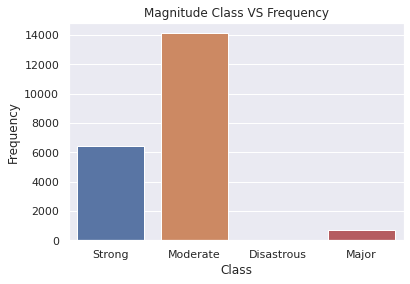

In [15]:
# Magnitude Class distribution

sns.countplot(x="Class", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Class VS Frequency')